Implement the kinematic bicycle model. The model accepts velocity and steering rate inputs and steps through the bicycle kinematic equations. 

\begin{align*}
\dot{x}_c &= v \cos{(\theta + \beta)} \\
\dot{y}_c &= v \sin{(\theta + \beta)} \\
\dot{\theta} &= \frac{v \cos{\beta} \tan{\delta}}{L} \\
\dot{\delta} &= \omega \\
\beta &= \tan^{-1}(\frac{l_r \tan{\delta}}{L})
\end{align*}

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

class Bicycle:
    def __init__(self):
        self.x = 0
        self.y = 0
        self.dt = 0.01

        self.theta = 0
        self.delta = 0
        self.beta = 0
        self.w_max = 1.22 # maximum turning rate of 1.22 rad/s

        self.L = 2
        self.lr = 1.2
        
    def reset(self):
        self.x = 0
        self.y = 0
        self.theta = 0
        self.delta = 0
        self.beta = 0
    
    def step(self, v, w):
        self.delta += w*self.dt
        self.beta = np.arctan2(self.lr*np.tan(self.delta), self.L)
        theta_dot = v*np.cos(self.beta)*np.tan(self.delta) / self.L
        self.theta += theta_dot*self.dt

        x_dot = v*np.cos(self.theta+self.beta)
        self.x += x_dot*self.dt 
        
        y_dot = v*np.sin(self.theta+self.beta)
        self.y += y_dot*self.dt
        

With the model setup, we can now start giving bicycle inputs and producing trajectories. 

Here we want the model to travel a circle of radius 10m in 20 seconds. Using the relationship between the radius of curvature and the steering angle, the desired steering angle can be computed.

\begin{align*}
    \tan{\delta} &= \frac{L}{r} \\
    \delta &= \tan^{-1}(\frac{L}{r}) \\
           &= \tan^{-1}(\frac{2}{10}) \\
           &= 0.1974
\end{align*}

If the steering angle is directly set to 0.1974 using a simplied bicycled model, then the bicycle will travel in a circle without requiring any additional steering input. 

The desired speed can be computed from the circumference of the circle:

\begin{align*}
    v &= \frac{d}{t}\\
     &= \frac{2 \pi 10}{20}\\
     &= \pi
\end{align*}

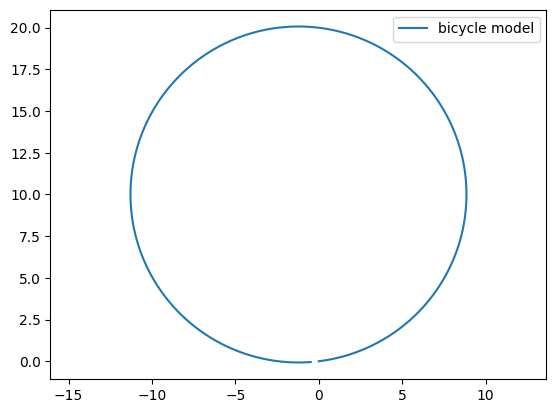

In [ ]:
dt = 0.01
end_time = 20

R = 10

model = Bicycle()
model.delta = np.arctan2(model.L, R)

t_data = np.arange(0, end_time, dt)
x_series = np.zeros_like(t_data)
y_series = np.zeros_like(t_data)

for i in range(t_data.shape[0]):
    x_series[i] = model.x
    y_series[i] = model.y 
    model.step(np.pi, 0)

plt.axis('equal')
plt.plot(x_series, y_series, label="bicycle model")
plt.legend()
plt.show()

The plot above shows the desired circle of 10m radius.

The path is slightly offset which is caused by the sideslip effects due to beta.

By forcing beta = 0 we can see that the offset disappears and the circle becomes centered at (0, 10).

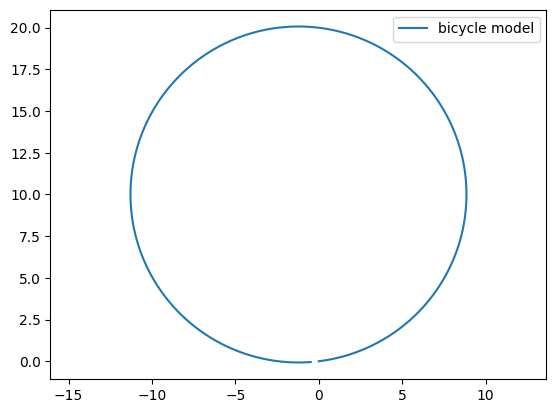

In [21]:
dt = 0.01
end_time = 20

R = 10

model = Bicycle()
model.delta = np.arctan2(model.L, R)

t_data = np.arange(0, end_time, dt)
x_series = np.zeros_like(t_data)
y_series = np.zeros_like(t_data)

for i in range(t_data.shape[0]):
    x_series[i] = model.x
    y_series[i] = model.y 
    model.step(np.pi, 0)
    model.beta = 0

plt.axis('equal')
plt.plot(x_series, y_series, label="bicycle model")
plt.legend()
plt.show()

In practice the steering angle cannot be directly set and must be changed through angular rate inputs $\omega$.

The code below corrects for this and sets angular rate inputs to generate the same circle trajectory.

The speed v is still maintained at $\pi$ m/s.

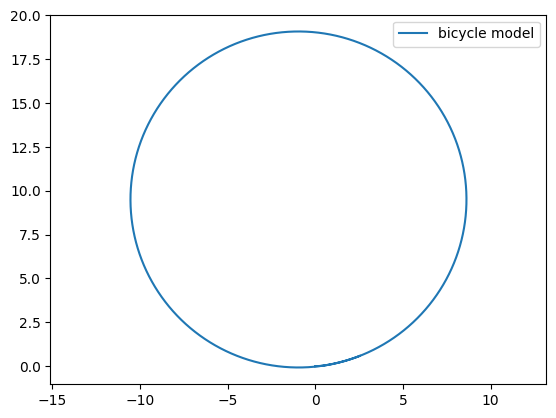

In [22]:
dt = 0.01
end_time = 20
model.reset()

t_data = np.arange(0, end_time, dt)
x_series = np.zeros_like(t_data)
y_series = np.zeros_like(t_data)

for i in range(t_data.shape[0]):
    x_series[i] = model.x
    y_series[i] = model.y 

    if model.delta < np.arctan2(2, 10):
        model.step(np.pi, model.w_max)
    else:
        model.step(np.pi, 0)

plt.axis('equal')
plt.plot(x_series, y_series, label="bicycle model")
plt.legend()
plt.show()

walk with other trajectories: a square path, a spiral path, and a wave path.

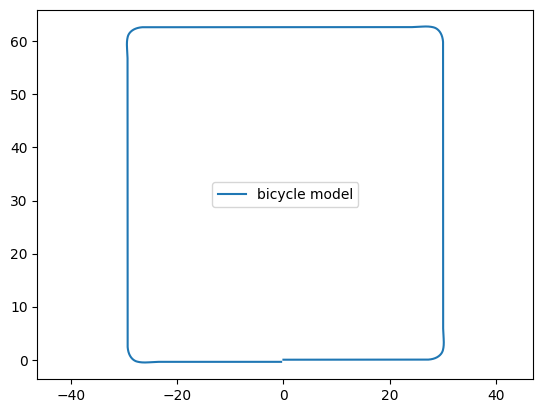

In [ ]:
# ==================================
#  Square Path: set w at corners only
# ==================================
def spiral_path(t_data):
    w_data = np.zeros_like(t_data)
    w_data[670:670+100] = 0.753
    w_data[670+100:670+100*2] = -0.753
    w_data[2210:2210+100] = 0.753
    w_data[2210+100:2210+100*2] = -0.753
    w_data[3670:3670+100] = 0.753
    w_data[3670+100:3670+100*2] = -0.753
    w_data[5220:5220+100] = 0.753
    w_data[5220+100:5220+100*2] = -0.753
    return w_data

dt = 0.01
end_time = 60
model.reset()

t_data = np.arange(0, end_time, dt)
x_series = np.zeros_like(t_data)
y_series = np.zeros_like(t_data)
w_data = spiral_path(t_data)

for i in range(t_data.shape[0]):
    x_series[i] = model.x
    y_series[i] = model.y 

    model.step(4, w_data[i])

plt.axis('equal')
plt.plot(x_series, y_series, label="bicycle model")
plt.legend()
plt.show()

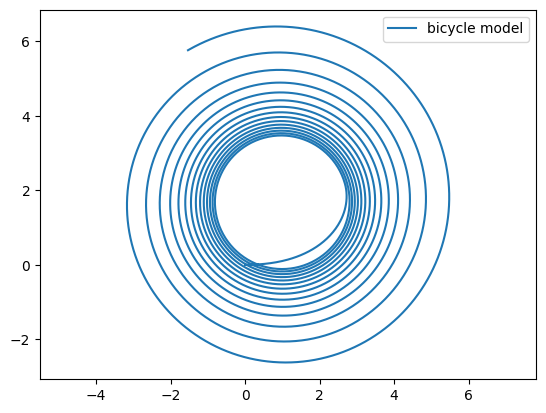

In [ ]:
# ==================================
#  Spiral Path: high positive w, then small negative w
# ==================================
def spiral_path(t_data):
    w_data = np.zeros_like(t_data)
    w_data[:] = -1/100
    w_data[0:100] = 1
    return w_data

dt = 0.01
end_time = 60
model.reset()

t_data = np.arange(0, end_time, dt)
x_series = np.zeros_like(t_data)
y_series = np.zeros_like(t_data)
w_data = spiral_path(t_data)

for i in range(t_data.shape[0]):
    x_series[i] = model.x
    y_series[i] = model.y 

    model.step(4, w_data[i])

plt.axis('equal')
plt.plot(x_series, y_series, label="bicycle model")
plt.legend()
plt.show()

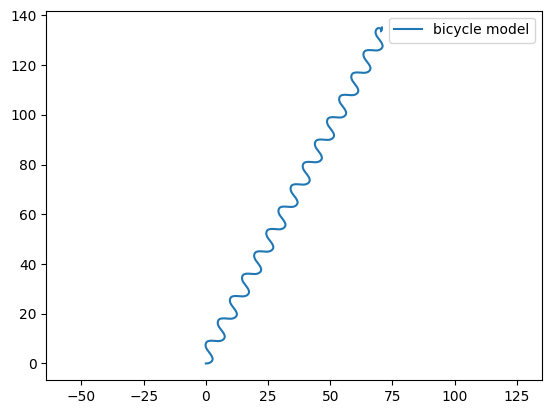

In [27]:
# ==================================
#  Wave Path: square wave w input
# ==================================
def wave_path(t_data):
    w_data = np.zeros_like(t_data)
    w_data[:] = 0
    w_data[0:100] = 1
    w_data[100:300] = -1
    w_data[300:500] = 1
    w_data[500:5700] = np.tile(w_data[100:500], 13)
    w_data[5700:] = -1
    return w_data

dt = 0.01
end_time = 60
model.reset()

t_data = np.arange(0, end_time, dt)
x_series = np.zeros_like(t_data)
y_series = np.zeros_like(t_data)
w_data = wave_path(t_data)

for i in range(t_data.shape[0]):
    x_series[i] = model.x
    y_series[i] = model.y 

    model.step(4, w_data[i])

plt.axis('equal')
plt.plot(x_series, y_series, label="bicycle model")
plt.legend()
plt.show()

Have the bicycle to travel a figure 8 trajectory

Both circles in the figure eight trajectory have a radius of 8m and the path should complete in 30 seconds 

The path begins at the bottom of the left circle and is shown in the figure below:

![title](figure8.png)

Determine the speed and steering rate inputs required to produce figure 8 trajectory.

Make sure to also save your inputs into the arrays v_data and w_data, these will be used to grade your solution.

The cell below also plots the trajectory generated by your own model.

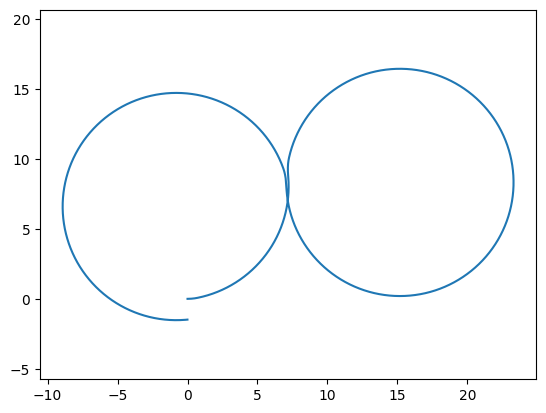

In [ ]:
sample_time = 0.01
time_end = 30
model = Bicycle()
max_delta = np.arctan2(2, 8)*0.95

t_data = np.arange(0, time_end, sample_time)
x_data = np.zeros_like(t_data)
y_data = np.zeros_like(t_data)

v_data = np.zeros_like(t_data)
v_data[:] = 32.0*np.pi/30.0

w_data = np.zeros_like(t_data)

for i in range(t_data.shape[0]):
    x_data[i] = model.x
    y_data[i] = model.y
        
    if i < t_data.shape[0]//8 or i > (5/8)*t_data.shape[0]:
        if model.delta < max_delta:
            model.step(v_data[i], model.w_max)
            w_data[i] = model.w_max
        else:
            model.step(v_data[i],0)
            w_data[i] = 0
    else:
        if model.delta > -max_delta:
            model.step(v_data[i], -model.w_max)
            w_data[i] = -model.w_max
        else:
            model.step(v_data[i],0)
            w_data[i] = 0

plt.axis('equal')
plt.plot(x_data, y_data)
plt.show()

In [6]:
data = np.vstack([t_data, v_data, w_data]).T
np.savetxt('figure8.txt', data, delimiter = ", ")